<a href="https://colab.research.google.com/github/efeoktistova/Iphone_HealthApp/blob/main/Iphone_health_app_sleep_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
pip install xmltodict

In [161]:
import pandas as pd
import numpy as np
import datetime
import xmltodict
input_path = '/content/drive/MyDrive/дек-фев.xml'
with open(input_path, 'r') as xml_file:
    input_data = xmltodict.parse(xml_file.read()) #Метод принимает файл XML в качестве ввода и изменения его для заказанного словаря


In [162]:
examp = pd.DataFrame(input_data)
examp

,HealthData
@locale,ru_RU
ActivitySummary,"[{'@dateComponents': '2021-11-20', '@activeEne..."
ExportDate,{'@value': '2022-03-02 19:02:38 +0300'}
Me,{'@HKCharacteristicTypeIdentifierDateOfBirth':...
Record,"[{'@type': 'HKQuantityTypeIdentifierHeight', '..."
Workout,[{'@workoutActivityType': 'HKWorkoutActivityTy...


In [163]:
input_data

{'HealthData': {'@locale': 'ru_RU',
  'ExportDate': {'@value': '2022-03-02 19:02:38 +0300'},
  'Me': {'@HKCharacteristicTypeIdentifierDateOfBirth': '1989-06-29',
   '@HKCharacteristicTypeIdentifierBiologicalSex': 'HKBiologicalSexFemale',
   '@HKCharacteristicTypeIdentifierBloodType': 'HKBloodTypeNotSet',
   '@HKCharacteristicTypeIdentifierFitzpatrickSkinType': 'HKFitzpatrickSkinTypeNotSet',
   '@HKCharacteristicTypeIdentifierCardioFitnessMedicationsUse': 'Нет'},
  'Record': [{'@type': 'HKQuantityTypeIdentifierHeight',
    '@sourceName': 'iPhone',
    '@sourceVersion': '15.1.1',
    '@unit': 'cm',
    '@creationDate': '2021-11-21 17:30:05 +0300',
    '@startDate': '2021-11-21 17:30:05 +0300',
    '@endDate': '2021-11-21 17:30:05 +0300',
    '@value': '168'},
   {'@type': 'HKQuantityTypeIdentifierBodyMass',
    '@sourceName': 'iPhone',
    '@sourceVersion': '15.1.1',
    '@unit': 'kg',
    '@creationDate': '2021-11-21 17:30:05 +0300',
    '@startDate': '2021-11-21 17:30:05 +0300',
    '@

In [164]:
records_list = input_data['HealthData']['Record']

In [165]:
type(input_data) #словарь

dict

In [166]:
type(records_list)

list

In [167]:
df = pd.DataFrame(records_list)
df.head(1)

,@type,@sourceName,@sourceVersion,@unit,@creationDate,@startDate,@endDate,@value,@device,MetadataEntry,HeartRateVariabilityMetadataList
0,HKQuantityTypeIdentifierHeight,iPhone,15.1.1,cm,2021-11-21 17:30:05 +0300,2021-11-21 17:30:05 +0300,2021-11-21 17:30:05 +0300,168,NaN,NaN,NaN


In [168]:
df['@type'].unique()

array(['HKQuantityTypeIdentifierHeight',
       'HKQuantityTypeIdentifierBodyMass',
       'HKQuantityTypeIdentifierHeartRate',
       'HKQuantityTypeIdentifierRespiratoryRate',
       'HKQuantityTypeIdentifierStepCount',
       'HKQuantityTypeIdentifierDistanceWalkingRunning',
       'HKQuantityTypeIdentifierBasalEnergyBurned',
       'HKQuantityTypeIdentifierActiveEnergyBurned',
       'HKQuantityTypeIdentifierFlightsClimbed',
       'HKQuantityTypeIdentifierAppleExerciseTime',
       'HKQuantityTypeIdentifierRestingHeartRate',
       'HKQuantityTypeIdentifierVO2Max',
       'HKQuantityTypeIdentifierWalkingHeartRateAverage',
       'HKQuantityTypeIdentifierEnvironmentalAudioExposure',
       'HKQuantityTypeIdentifierHeadphoneAudioExposure',
       'HKQuantityTypeIdentifierWalkingDoubleSupportPercentage',
       'HKQuantityTypeIdentifierSixMinuteWalkTestDistance',
       'HKQuantityTypeIdentifierAppleStandTime',
       'HKQuantityTypeIdentifierWalkingSpeed',
       'HKQuantityTypeIden

In [169]:
# строки, относящиеся ко сну
df_a = df[df['@type'] == 'HKCategoryTypeIdentifierSleepAnalysis']
df_a.tail(3)

,@type,@sourceName,@sourceVersion,@unit,@creationDate,@startDate,@endDate,@value,@device,MetadataEntry,HeartRateVariabilityMetadataList
252356,HKCategoryTypeIdentifierSleepAnalysis,Apple Watch — Елена,8.3,NaN,2022-03-02 09:36:59 +0300,2022-03-02 05:13:21 +0300,2022-03-02 05:16:51 +0300,HKCategoryValueSleepAnalysisAsleep,NaN,"{'@key': 'HKTimeZone', '@value': 'Europe/Moscow'}",NaN
252357,HKCategoryTypeIdentifierSleepAnalysis,Apple Watch — Елена,8.3,NaN,2022-03-02 09:36:59 +0300,2022-03-02 05:22:51 +0300,2022-03-02 05:23:51 +0300,HKCategoryValueSleepAnalysisAsleep,NaN,"{'@key': 'HKTimeZone', '@value': 'Europe/Moscow'}",NaN
252358,HKCategoryTypeIdentifierSleepAnalysis,Apple Watch — Елена,8.3,NaN,2022-03-02 09:36:59 +0300,2022-03-02 06:10:51 +0300,2022-03-02 09:29:51 +0300,HKCategoryValueSleepAnalysisAsleep,NaN,"{'@key': 'HKTimeZone', '@value': 'Europe/Moscow'}",NaN


In [170]:
df_a.shape

(996, 11)

In [171]:
df_a['@value'].unique()

array(['HKCategoryValueSleepAnalysisInBed',
       'HKCategoryValueSleepAnalysisAsleep'], dtype=object)

In [172]:
#отбор столбцов
df_b = df_a.drop(['@sourceName', '@sourceVersion', '@type', '@unit', '@device', 'MetadataEntry','HeartRateVariabilityMetadataList'], axis =1)
df_b.head()

,@creationDate,@startDate,@endDate,@value
251363,2021-12-05 07:00:09 +0300,2021-12-04 22:08:50 +0300,2021-12-05 07:00:09 +0300,HKCategoryValueSleepAnalysisInBed
251364,2021-12-06 07:05:53 +0300,2021-12-05 23:18:56 +0300,2021-12-05 23:19:26 +0300,HKCategoryValueSleepAnalysisAsleep
251365,2021-12-06 07:05:53 +0300,2021-12-05 23:33:26 +0300,2021-12-06 01:04:26 +0300,HKCategoryValueSleepAnalysisAsleep
251366,2021-12-06 07:05:53 +0300,2021-12-06 01:06:26 +0300,2021-12-06 01:21:56 +0300,HKCategoryValueSleepAnalysisAsleep
251367,2021-12-06 07:05:53 +0300,2021-12-06 01:28:26 +0300,2021-12-06 02:11:26 +0300,HKCategoryValueSleepAnalysisAsleep


In [173]:
#отбор строк(InBed - время в кровати, Asleep - сон)
df_c = df_b[df_b['@value'] == 'HKCategoryValueSleepAnalysisAsleep']
df_c.head()

,@creationDate,@startDate,@endDate,@value
251364,2021-12-06 07:05:53 +0300,2021-12-05 23:18:56 +0300,2021-12-05 23:19:26 +0300,HKCategoryValueSleepAnalysisAsleep
251365,2021-12-06 07:05:53 +0300,2021-12-05 23:33:26 +0300,2021-12-06 01:04:26 +0300,HKCategoryValueSleepAnalysisAsleep
251366,2021-12-06 07:05:53 +0300,2021-12-06 01:06:26 +0300,2021-12-06 01:21:56 +0300,HKCategoryValueSleepAnalysisAsleep
251367,2021-12-06 07:05:53 +0300,2021-12-06 01:28:26 +0300,2021-12-06 02:11:26 +0300,HKCategoryValueSleepAnalysisAsleep
251368,2021-12-06 07:05:53 +0300,2021-12-06 02:18:56 +0300,2021-12-06 05:36:26 +0300,HKCategoryValueSleepAnalysisAsleep


In [174]:
df_c = df_c.rename(columns={'@creationDate': 'creation_date', '@startDate': 'start_time', '@endDate': 'end_time', '@value': 'value'})

In [175]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855 entries, 251364 to 252358
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   creation_date  855 non-null    object
 1   start_time     855 non-null    object
 2   end_time       855 non-null    object
 3   value          855 non-null    object
dtypes: object(4)
memory usage: 33.4+ KB


In [176]:
#преобразование дат
df_c['creation_date'] = df_c['creation_date'].astype('datetime64')
df_c['creation_date'] = df_c['creation_date'].dt.date
df_c['start_time'] = df_c['start_time'].astype('datetime64')
df_c['end_time'] = df_c['end_time'].astype('datetime64')

In [177]:
# убираем вложенные интервалы (при ручном внесение данных)
# сортировка по возрастанию в "start", затем по убыванию в "end"
# такая сортировка нужна при совпадении дат в "start"
df_c.sort_values(by=['start_time', 'end_time'], ascending = [True, False], inplace=True)
df_c

,creation_date,start_time,end_time,value
251364,2021-12-06,2021-12-05 20:18:56,2021-12-05 20:19:26,HKCategoryValueSleepAnalysisAsleep
251365,2021-12-06,2021-12-05 20:33:26,2021-12-05 22:04:26,HKCategoryValueSleepAnalysisAsleep
251366,2021-12-06,2021-12-05 22:06:26,2021-12-05 22:21:56,HKCategoryValueSleepAnalysisAsleep
251367,2021-12-06,2021-12-05 22:28:26,2021-12-05 23:11:26,HKCategoryValueSleepAnalysisAsleep
251368,2021-12-06,2021-12-05 23:18:56,2021-12-06 02:36:26,HKCategoryValueSleepAnalysisAsleep
...,...,...,...,...
252354,2022-03-02,2022-03-02 00:20:51,2022-03-02 00:25:21,HKCategoryValueSleepAnalysisAsleep
252355,2022-03-02,2022-03-02 00:28:21,2022-03-02 02:08:21,HKCategoryValueSleepAnalysisAsleep
252356,2022-03-02,2022-03-02 02:13:21,2022-03-02 02:16:51,HKCategoryValueSleepAnalysisAsleep
252357,2022-03-02,2022-03-02 02:22:51,2022-03-02 02:23:51,HKCategoryValueSleepAnalysisAsleep


In [178]:
# убираем вложенные интервалы (при ручном внесение данных)
# выбираем макс окончание
df_c['x_end'] = df_c.end_time.cummax()
#df_c.loc[251800:251821]
df_c

,creation_date,start_time,end_time,value,x_end
251364,2021-12-06,2021-12-05 20:18:56,2021-12-05 20:19:26,HKCategoryValueSleepAnalysisAsleep,2021-12-05 20:19:26
251365,2021-12-06,2021-12-05 20:33:26,2021-12-05 22:04:26,HKCategoryValueSleepAnalysisAsleep,2021-12-05 22:04:26
251366,2021-12-06,2021-12-05 22:06:26,2021-12-05 22:21:56,HKCategoryValueSleepAnalysisAsleep,2021-12-05 22:21:56
251367,2021-12-06,2021-12-05 22:28:26,2021-12-05 23:11:26,HKCategoryValueSleepAnalysisAsleep,2021-12-05 23:11:26
251368,2021-12-06,2021-12-05 23:18:56,2021-12-06 02:36:26,HKCategoryValueSleepAnalysisAsleep,2021-12-06 02:36:26
...,...,...,...,...,...
252354,2022-03-02,2022-03-02 00:20:51,2022-03-02 00:25:21,HKCategoryValueSleepAnalysisAsleep,2022-03-02 00:25:21
252355,2022-03-02,2022-03-02 00:28:21,2022-03-02 02:08:21,HKCategoryValueSleepAnalysisAsleep,2022-03-02 02:08:21
252356,2022-03-02,2022-03-02 02:13:21,2022-03-02 02:16:51,HKCategoryValueSleepAnalysisAsleep,2022-03-02 02:16:51
252357,2022-03-02,2022-03-02 02:22:51,2022-03-02 02:23:51,HKCategoryValueSleepAnalysisAsleep,2022-03-02 02:23:51


In [179]:
#количество уник записей в столбце x_end
len(df_c.x_end.unique())

825

In [180]:
# убираем вложенные интервалы (при ручном внесение данных)
# убираем дубликаты по x_end
# пересекающиеся интервалы остаются
df_c.drop_duplicates(subset='x_end', inplace=True)
df_c.drop(columns='x_end', inplace=True)

In [181]:
df_c

,creation_date,start_time,end_time,value
251364,2021-12-06,2021-12-05 20:18:56,2021-12-05 20:19:26,HKCategoryValueSleepAnalysisAsleep
251365,2021-12-06,2021-12-05 20:33:26,2021-12-05 22:04:26,HKCategoryValueSleepAnalysisAsleep
251366,2021-12-06,2021-12-05 22:06:26,2021-12-05 22:21:56,HKCategoryValueSleepAnalysisAsleep
251367,2021-12-06,2021-12-05 22:28:26,2021-12-05 23:11:26,HKCategoryValueSleepAnalysisAsleep
251368,2021-12-06,2021-12-05 23:18:56,2021-12-06 02:36:26,HKCategoryValueSleepAnalysisAsleep
...,...,...,...,...
252354,2022-03-02,2022-03-02 00:20:51,2022-03-02 00:25:21,HKCategoryValueSleepAnalysisAsleep
252355,2022-03-02,2022-03-02 00:28:21,2022-03-02 02:08:21,HKCategoryValueSleepAnalysisAsleep
252356,2022-03-02,2022-03-02 02:13:21,2022-03-02 02:16:51,HKCategoryValueSleepAnalysisAsleep
252357,2022-03-02,2022-03-02 02:22:51,2022-03-02 02:23:51,HKCategoryValueSleepAnalysisAsleep


In [182]:
#время промежутка сна
df_c['dif'] = df_c['end_time'] - df_c['start_time']
df_c.head(2)

,creation_date,start_time,end_time,value,dif
251364,2021-12-06,2021-12-05 20:18:56,2021-12-05 20:19:26,HKCategoryValueSleepAnalysisAsleep,0 days 00:00:30
251365,2021-12-06,2021-12-05 20:33:26,2021-12-05 22:04:26,HKCategoryValueSleepAnalysisAsleep,0 days 01:31:00


In [183]:
df_c.describe()

,dif
count,825
mean,0 days 00:41:21.127272727
std,0 days 00:50:39.782553948
min,0 days 00:00:30
25%,0 days 00:04:00
50%,0 days 00:17:30
75%,0 days 01:06:00
max,0 days 05:14:00


In [184]:
#отбирает интервалы > 10 минут, т.к. меньшие промежутки могли быть следствием "погрешности" измерения
df_result = df_c[df_c.dif>'0 days 00:10:00']
df_result.shape

(480, 5)

In [185]:
df_result.describe()

,dif
count,480
mean,0 days 01:08:10.375000
std,0 days 00:51:49.944428377
min,0 days 00:10:30
25%,0 days 00:25:30
50%,0 days 00:58:30
75%,0 days 01:34:00
max,0 days 05:14:00


In [186]:
#группировка по дням и расчет общего количества сна и количества просыпаний за ночь
df_result = df_result.groupby(['creation_date'])['dif'].agg([('Sleep','sum'), ('Wakeup','count')]).reset_index()
df_result['Wakeup'] = df_result['Wakeup']-1
df_result.tail(13)

,creation_date,Sleep,Wakeup
68,2022-02-18,0 days 07:42:00,4
69,2022-02-19,0 days 05:56:30,4
70,2022-02-20,0 days 06:37:30,4
71,2022-02-21,0 days 07:53:30,8
72,2022-02-22,0 days 06:17:00,3
73,2022-02-23,0 days 06:27:00,4
74,2022-02-24,0 days 05:17:30,5
75,2022-02-25,0 days 06:19:00,7
76,2022-02-26,0 days 03:33:30,3
77,2022-02-27,0 days 07:26:00,4


In [188]:
df_result.describe()


,Sleep,Wakeup
count,81,81.000000
mean,0 days 06:43:59.259259259,4.925926
std,0 days 01:22:15.827381953,1.876018
min,0 days 01:41:00,0.000000
25%,0 days 06:12:00,4.000000
50%,0 days 06:55:30,5.000000
75%,0 days 07:33:00,6.000000
max,0 days 09:53:30,10.000000


In [99]:
#отбор строк c сянваря 2022 по индексу
#df_final = df_result[51:]
#df_final

In [100]:
import matplotlib.pyplot as plt


In [148]:
#формат меток для оси у
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DayLocator, num2date

def format_func_y(x, pos):
    hours = int(x//3600)
    minutes = int((x%3600)//60)
    seconds = int(x%60)

    return "{:d}:{:02d}".format(hours, minutes)

#formatter = FuncFormatter(format_func)

In [149]:
#формат меток для оси х
def format_func_x (x, pos):
    dt = num2date(x)
    if dt.day == 1:
        return dt.strftime('%b') #сокращенная форма месяца
    return dt.strftime('%d')


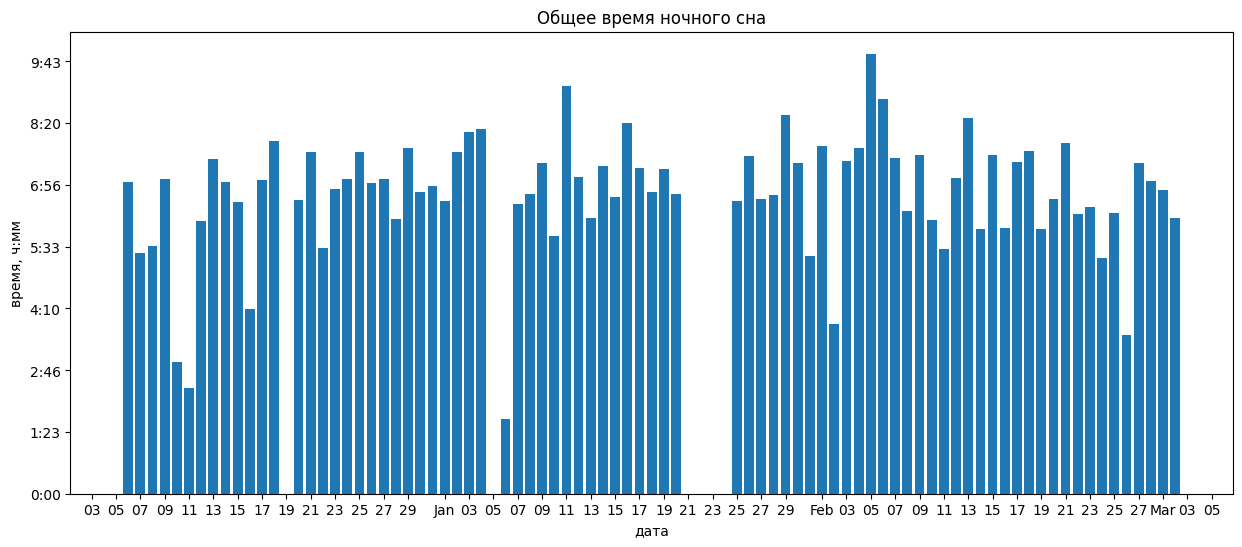

In [153]:
labels = df_result['creation_date']
seconds = [i.seconds for i in df_result['Sleep']]
f = plt.figure(figsize=(15, 6))
ax = f.add_subplot(1,1,1)
ax.bar(labels, seconds)
plt.title("Общее время ночного сна")
plt.xlabel("дата")
plt.ylabel("время, ч:мм")

ax.yaxis.set_major_formatter(FuncFormatter(format_func_y))
locator = DayLocator((1,3,5,7,9,11,13, 15, 17, 19, 21, 23,25,27,29))
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(FuncFormatter(format_func_x))

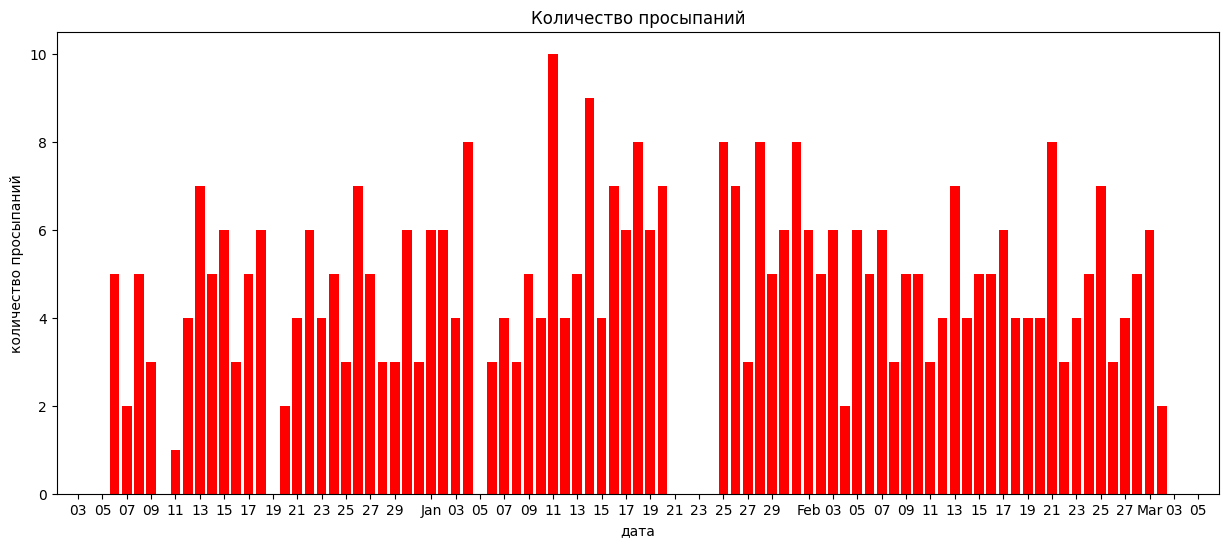

In [155]:
labels = df_result['creation_date']
y = df_result['Wakeup']
f = plt.figure(figsize = (15,6))
ax = f.add_subplot(1,1,1)
ax.bar(labels, y, color = 'red')

plt.title("Количество просыпаний")
plt.xlabel("дата")
plt.ylabel("количество просыпаний")

ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(FuncFormatter(format_func_x))

In [ ]:
df_result.to_excel('sleep_time.xlsx')